# Compare methods using lupus data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import functools
import numpy as np
import scanpy as sc

In [3]:
data_path = '/data_volume/bulkrna/lupus/'

In [4]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", ['turquoise', 'slategrey', 'silver'])

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'figure.titlesize':'medium',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

In [5]:
pal = [(64/255,224/255,208/255)]+sns.color_palette("Greys", 10)[4:]

### Compute the concordance curve

In [6]:
def concordance_curve(ref1, ref2, ref3, ref4, x, k=300):
    overlap = []
    for i in range(1, k+1):
        
        a = len(set(x[:i]) & set(ref1[:i]))
        b = len(set(x[:i]) & set(ref2[:i]))
        c = len(set(x[:i]) & set(ref3[:i]))
        d = len(set(x[:i]) & set(ref4[:i]))
        overlap.append((a+b+c+d)/4)
        
    return np.arange(1, k+1), np.array(overlap)

In [7]:
def concordance_curve(ref1, ref2, ref3, ref4, x, k=300):
    overlap = []
    for i in range(1, k+1):
        
        a = len(set(x[:i]) & set(ref1[:i]))
        b = len(set(x[:i]) & set(ref2[:i]))
        c = len(set(x[:i]) & set(ref3[:i]))
        d = len(set(x[:i]) & set(ref4[:i]))
        overlap.append((a+b+c+d)/4)
        
    return np.arange(1, k+1), np.array(overlap)

def concordance_auc(ref1, ref2, ref3, ref4, x, k=100):
    count = 0
    for i in range(1, k+1):
        
        a = len(set(x[:i]) & set(ref1[:i]))
        b = len(set(x[:i]) & set(ref2[:i]))
        c = len(set(x[:i]) & set(ref3[:i]))
        d = len(set(x[:i]) & set(ref4[:i]))
        count += (a+b+c+d)/4
        
    return count / (k*(k+1)/2)

### Read results with repeated trials

In [ ]:
all_results = []
num_cells = 100
for trial in range(50):        
    name_paths = [
        ('bulk_edger_lrt','T4_vs_cM.bulk.edger_lrt.{}.{}.csv'.format(numcells, trial), ['logFC','PValue', 'FDR']), 
        ('bulk_edger_qlft','T4_vs_cM.bulk.edger_qlft.{}.{}.csv'.format(numcells, trial), ['logFC','PValue', 'FDR']),
        ('bulk_deseq2_wald', 'T4_vs_cM.bulk.deseq2_wald.{}.{}.csv'.format(numcells, trial), ['log2FoldChange','pvalue', 'padj']),
        ('bulk_deseq2_lrt', 'T4_vs_cM.bulk.deseq2_lrt.{}.{}.csv'.format(numcells, trial), ['log2FoldChange','pvalue', 'padj']),
        ('edgeR','T4_vs_cM.pseudobulk.edger_lrt.{}.{}.csv'.format(numcells, trial), ['logFC','PValue', 'FDR']),
        # ('edgeR_qlft','T4_vs_cM.pseudobulk.edger_qlft.{}.{}.csv'.format(numcells, trial), ['logFC','PValue', 'FDR']),

        ('DESeq2','T4_vs_cM.pseudobulk.deseq2_wald.{}.{}.csv'.format(numcells, trial), ['log2FoldChange','pvalue', 'padj']),
        ('t-test','{}_{}_t.csv'.format(numcells, trial), ['logFC','PValue', 'FDR']),
        ('MWU','{}_{}_mwu.csv'.format(numcells, trial), ['logFC','PValue', 'FDR']),
        # ('MAST','T4_vs_cM.sc.MAST.{}.{}.csv'.format(numcells, trial), ['coef','Pr(>Chisq)', 'fdr']),
        ('quasiGLM', '{}_{}_quasiGLM.csv'.format(numcells, trial), ['coef','pval', 'fdr']),
        ('quasiML', '{}_{}_quasiML.csv'.format(numcells, trial), ['coef', 'pval', 'fdr'])
    ]
    results = [pd.read_csv(data_path + path, index_col=0)[cols].rename(columns=dict(zip(cols,['logFC','PValue', 'FDR'])))  for name, path, cols in name_paths]
    gene_lists = [set(res.index) for res in results]
    genes = list(functools.reduce(lambda x,y: x & y, gene_lists))
    results = [res.loc[genes].sort_values('FDR') for res in results]

    scores = [
        (name_paths[idx+4][0].replace('_', '\n'), numcells, trial, concordance_auc(
            results[0].index, 
            results[1].index, 
            results[2].index,
            results[3].index,
            res.index)) for idx, res in enumerate(results[4:])]
    all_results+=scores

    curves = [
        concordance_curve(
            results[0].index, 
            results[1].index, 
            results[2].index,
            results[3].index,
            res.index) for res in results[4:]]

In [20]:
df = pd.DataFrame(all_results, columns=['name', 'numcells','trials', 'auc'])

/tmp/ipykernel_260543/2069574887.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_260543/2069574887.py:2: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.boxplot(
/tmp/ipykernel_260543/2069574887.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
/tmp/ipykernel_260543/2069574887.py:15: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.stripplot(


Text(0, 0.5, '')

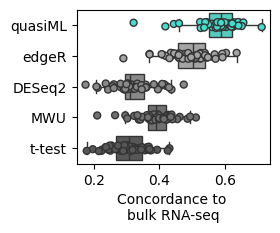

In [21]:
plt.figure(figsize=(2.5,2))
sns.boxplot(
    y='name',
    x='auc', 
    data=df, 
    order=[
        'quasiML',
        'edgeR',
        'DESeq2',
        # 'MAST',
        'MWU',
        't-test',],
    fliersize=0,
    palette=pal)
sns.stripplot(
    y='name',
    x='auc', 
    data=df, 
    order=[
        'quasiML',
        'edgeR',
        'DESeq2',
        # 'MAST',
        'MWU',
        't-test',],
    linewidth=1,
    palette=pal)
plt.xlabel('Concordance to \nbulk RNA-seq')
plt.ylabel('')
# plt.savefig('lupus_bulk_comparison.pdf', bbox_inches='tight')